<a href="https://colab.research.google.com/github/cyuancheng/Machine_Learning_Practice/blob/master/PCA_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/gvr37or7d69ed1j/diabetes.csv

--2019-10-10 22:33:59--  https://www.dropbox.com/s/gvr37or7d69ed1j/diabetes.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/gvr37or7d69ed1j/diabetes.csv [following]
--2019-10-10 22:33:59--  https://www.dropbox.com/s/raw/gvr37or7d69ed1j/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ba1349929cfd4f938d6525330.dl.dropboxusercontent.com/cd/0/inline/AqNGLXeAMmHuomHaIEBcdPRcJf1Admx4GE5JwRv_bBjI1uzi6qv00U2_gCq5i0N1fotmqplY8Pe_K9VTGuETYBZZHaRn14XxEMRCdN9VKFBFXFAlsNX6tUg_D2cjMCFtZKQ/file# [following]
--2019-10-10 22:33:59--  https://uc3ba1349929cfd4f938d6525330.dl.dropboxusercontent.com/cd/0/inline/AqNGLXeAMmHuomHaIEBcdPRcJf1Admx4GE5JwRv_bBjI1uzi6qv00U2_gCq5i0N1fotmqplY8Pe_K9VTGuETYBZZHaRn14XxEMRCdN9VKFBFXFAlsN

In [0]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import LinearSVC #https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
np.random.seed(42)

In [0]:
df = pd.read_csv('diabetes.csv')

In [27]:
df.shape

(768, 9)

In [28]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


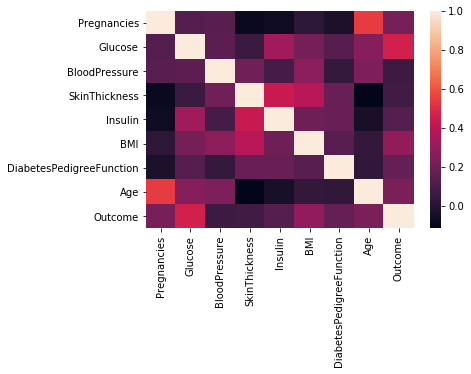

In [37]:
sns.heatmap(df.corr())

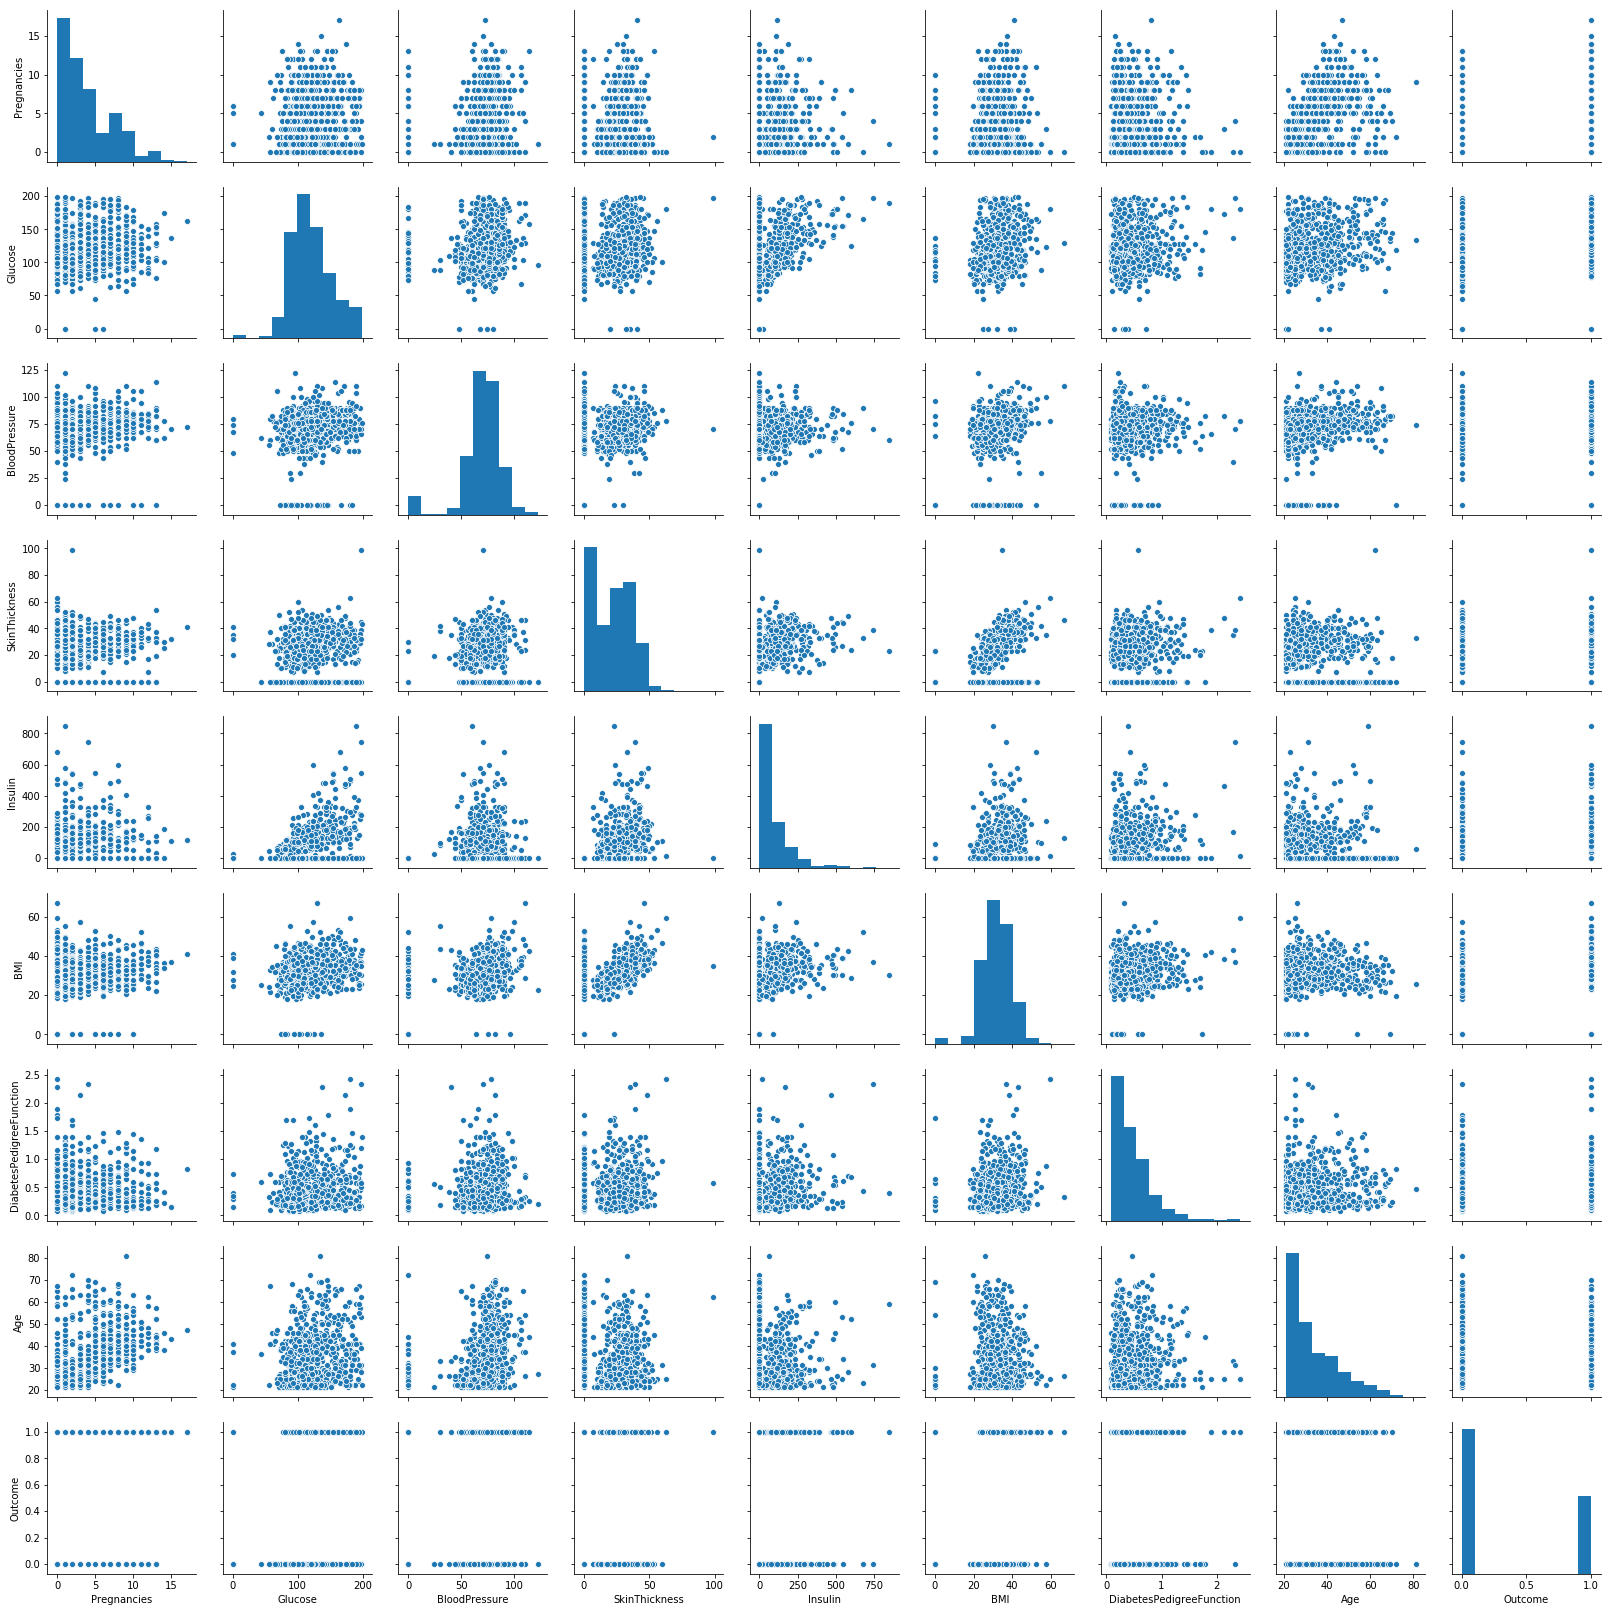

In [41]:
# before standarization
sns.pairplot(df)

In [38]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [0]:
x = df.iloc[:,0:8].values  # feature
y = df.iloc[:,8].values  # label

In [30]:
type(x)

numpy.ndarray

In [31]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [43]:
df.iloc[:,8].value_counts() # check labels

0    500
1    268
Name: Outcome, dtype: int64

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [52]:
x_train.shape

(614, 8)

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
pd_x_train = pd.DataFrame(x_train, columns = df.columns.tolist()[0:8])
pd_x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.360339,-0.514164,0.312349,-0.738798,0.460508,-0.048841,0.037969,-0.939015
1,-0.690513,-0.467637,-1.101647,1.054271,-0.991384,0.531025,-1.310200,0.572693
2,-0.953208,-0.591539,0.282008,0.584081,-0.181293,-0.964700,-0.074858,0.236405
3,0.452771,1.290274,1.348241,2.698426,0.961513,-0.792495,0.192236,-0.663613
4,-0.320290,-1.322075,-0.769600,-0.958490,-0.083885,-0.078023,-0.103615,0.191219


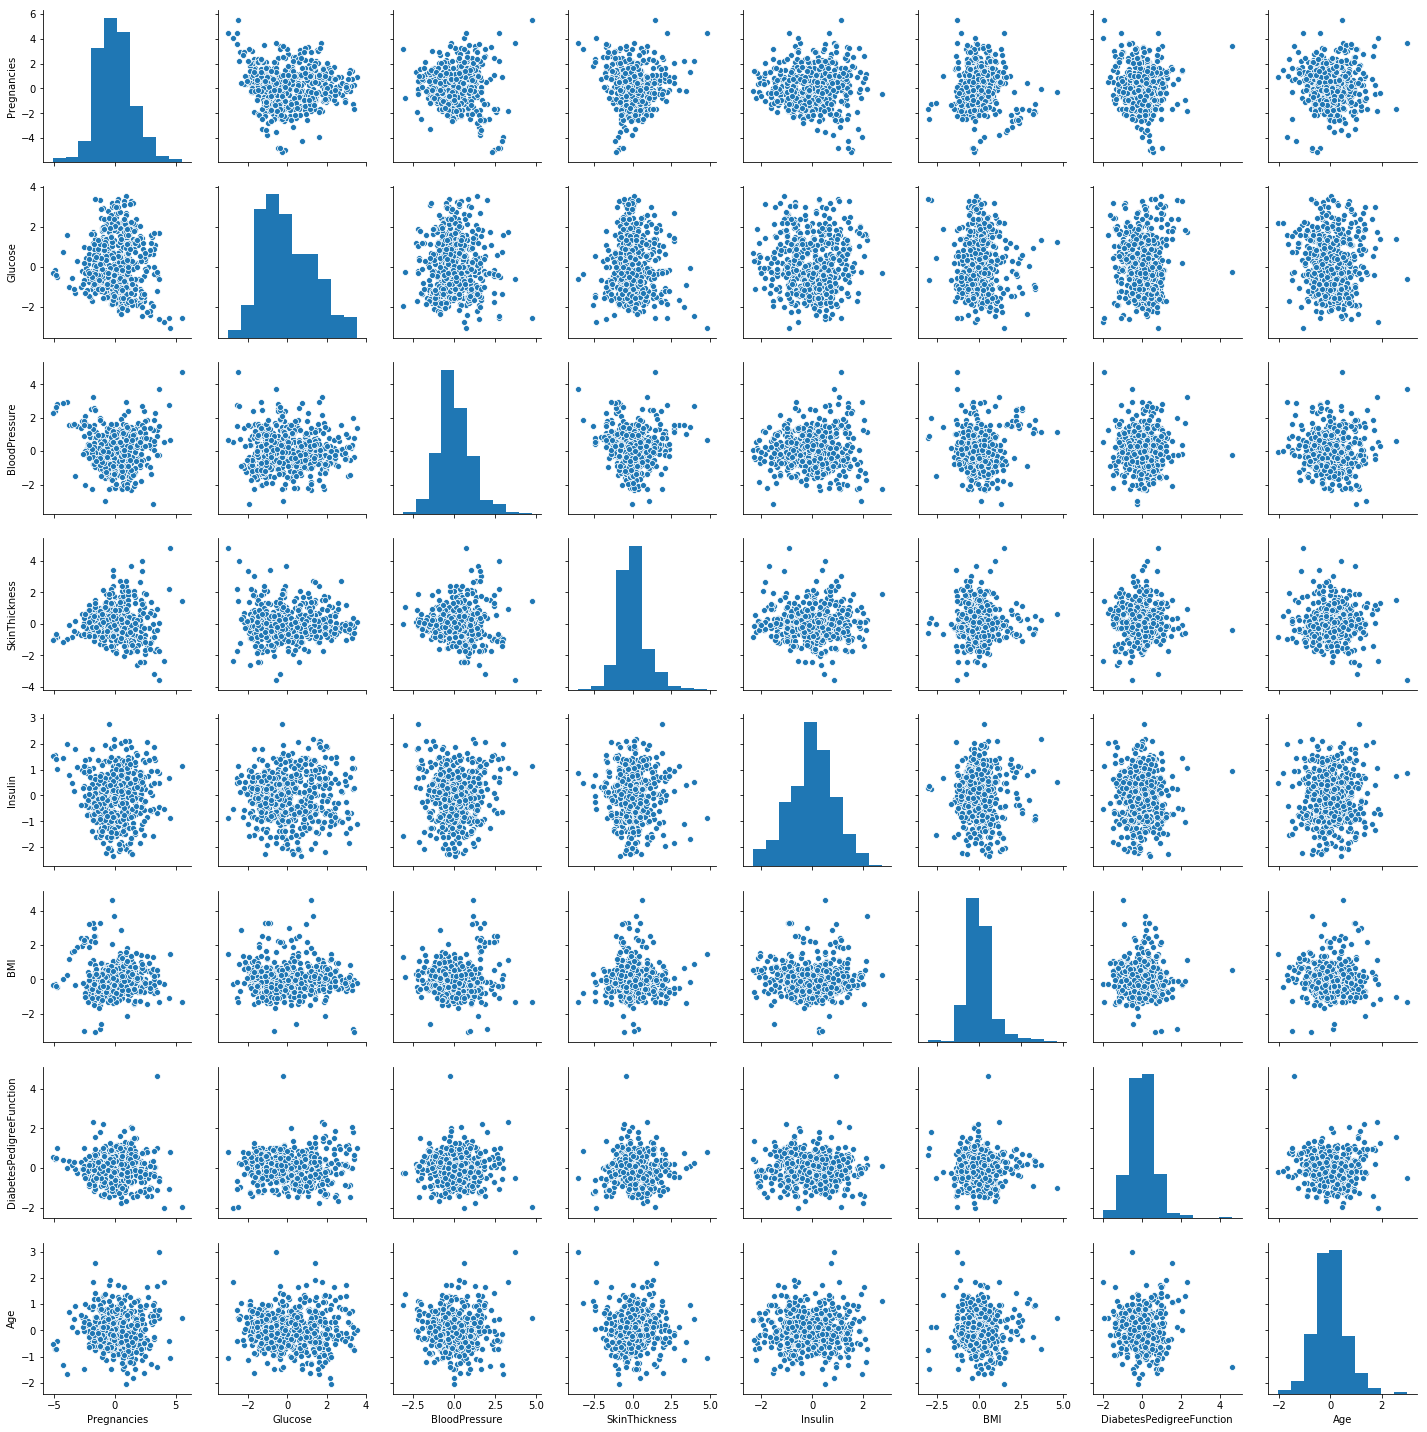

In [68]:
# after standarization (for x_train)
sns.pairplot(pd_x_train)

Logistic Regression w/o PCA

In [71]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)
print('accuracy=',accuracy_score(y_test, y_pred))
print('precision=',precision_score(y_test, y_pred))
print('recall=',recall_score(y_test, y_pred))
print('f1=',f1_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
cm

accuracy= 0.8181818181818182
precision= 0.75
recall= 0.5454545454545454
f1= 0.631578947368421


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[102,   8],
       [ 20,  24]])

PCA

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components=None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [14]:
pca.explained_variance_ratio_

array([0.2627551 , 0.21455609, 0.13059504, 0.10886153, 0.09513073,
       0.08400705, 0.05398456, 0.05010989])

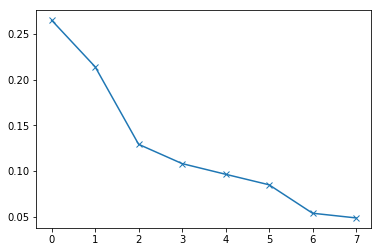

In [77]:
plt.plot(pca.explained_variance_ratio_, marker='x')

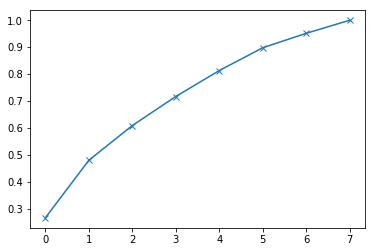

In [82]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='x')

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
pca.explained_variance_ratio_

array([0.26222738, 0.21485802, 0.12768367])

In [90]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
y_pred = log_reg.predict(x_test)
print('accuracy=',accuracy_score(y_test, y_pred))
print('precision=',precision_score(y_test, y_pred))
print('recall=',recall_score(y_test, y_pred))
print('f1=',f1_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
cm

accuracy= 0.6558441558441559
precision= 0.475
recall= 0.37254901960784315
f1= 0.4175824175824176


array([[82, 21],
       [32, 19]])

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components=6)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

print('accuracy=',accuracy_score(y_test, y_pred))
print('precision=',precision_score(y_test, y_pred))
print('recall=',recall_score(y_test, y_pred))
print('f1=',f1_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
cm

accuracy= 0.7987012987012987
precision= 0.7894736842105263
recall= 0.5660377358490566
f1= 0.6593406593406593


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[93,  8],
       [23, 30]])

In [93]:
compare = pd.DataFrame(y_test,columns=['y_test'])
compare['y_predicted'] = y_pred
compare.head()

,y_test,y_predicted
0,0,1
1,1,1
2,0,0
3,0,0
4,0,0


SVM

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

svm = SVC() #https://en.wikipedia.org/wiki/Radial_basis_function_kernel
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

print('accuracy=',accuracy_score(y_test, y_pred))
print('precision=',precision_score(y_test, y_pred))
print('recall=',recall_score(y_test, y_pred))
print('f1=',f1_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
cm

accuracy= 0.7532467532467533
precision= 0.6739130434782609
recall= 0.5740740740740741
f1= 0.62


array([[85, 15],
       [23, 31]])

cross-validation

In [95]:
accuracies = cross_val_score(estimator=svm,X=x_train,y=y_train,cv=10)
accuracies

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

array([0.75806452, 0.69354839, 0.72580645, 0.74193548, 0.72131148,
       0.63934426, 0.83606557, 0.73770492, 0.78688525, 0.80327869])

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components=6)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print('accuracy=',accuracy_score(y_test, y_pred))
print('precision=',precision_score(y_test, y_pred))
print('recall=',recall_score(y_test, y_pred))
print('f1=',f1_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
cm

accuracy= 0.8246753246753247
precision= 0.7714285714285715
recall= 0.5869565217391305
f1= 0.6666666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[100,   8],
       [ 19,  27]])

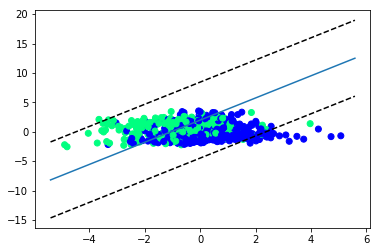

In [97]:
from matplotlib import pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

svc = LinearSVC()
svc.fit(x_train, y_train)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')